# Parte 4: Segmentacion
Segmentar objetos de la imagen mediante:

o	Umbralado (global y adaptativo).

o	Segmentación por color (HSV).

o	K-means clustering.



In [2]:
#Importar las librerias necesarias
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
!pip install matplotlib


El tamaño de la imagen es:  (2004, 2672, 3)


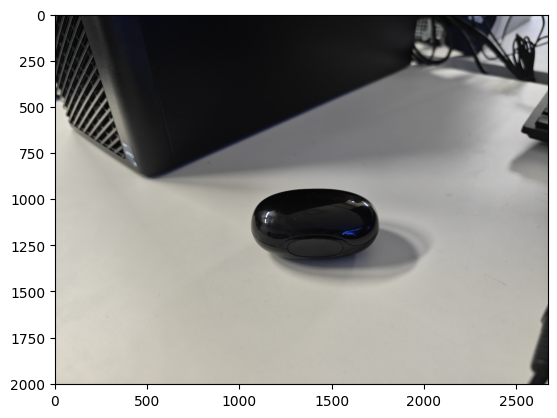

In [4]:
bgr = cv2.imread('Image.jpg')
print("El tamaño de la imagen es: ", bgr.shape)

# Convertir la imagen de BGR a RGB
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(rgb)

## Umbralado (global y adaptativo)
A continuación se muestra cómo segmentar la imagen usando umbralado global y adaptativo con OpenCV.

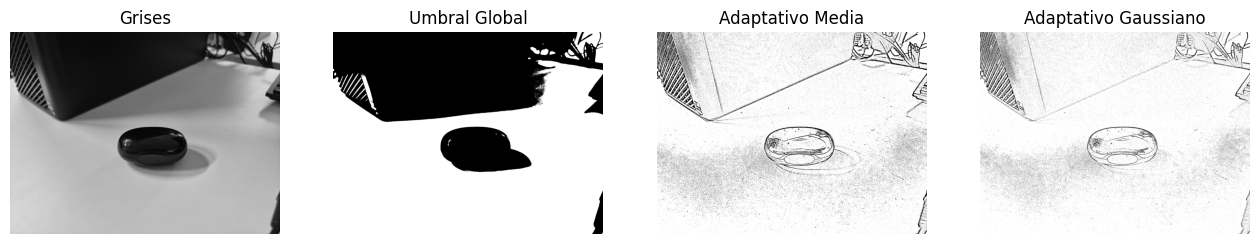

In [6]:
# Convertir la imagen a escala de grises
img_gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# Umbralado global
_, th_global = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Umbralado adaptativo (media y gaussiano)
th_adapt_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th_adapt_gauss = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Mostrar resultados
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Grises')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(th_global, cmap='gray')
plt.title('Umbral Global')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(th_adapt_mean, cmap='gray')
plt.title('Adaptativo Media')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(th_adapt_gauss, cmap='gray')
plt.title('Adaptativo Gaussiano')
plt.axis('off')
plt.show()

## Segmentacion por color (HSV)
Ahora se muestra la segmentacion de la imagen usando segmentacion por color HSV con OpenCV.

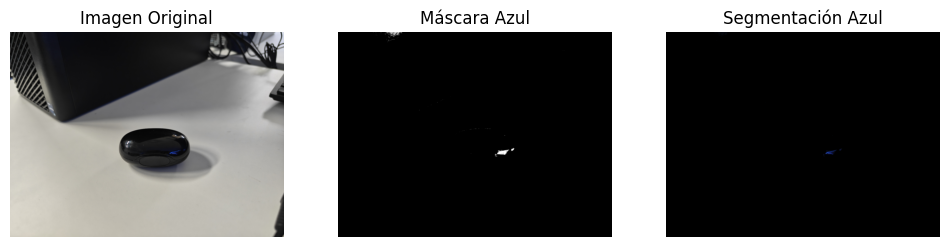

In [7]:
#Segmentacion por color (HSV)
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
# Definir el rango de color a segmentar (por ejemplo, azul)
lower_blue = np.array([100, 150, 0])
upper_blue = np.array([140, 255, 255])
# Crear una máscara para el color azul
mask = cv2.inRange(hsv, lower_blue, upper_blue)
# Aplicar la máscara a la imagen original
result = cv2.bitwise_and(bgr, bgr, mask=mask)
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(mask, cmap='gray')
plt.title('Máscara Azul')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Segmentación Azul')
plt.axis('off')
plt.show()

## K-means clustering.
A continuacion la muestra de la segmentacion por K-means clustering con OpenCV.

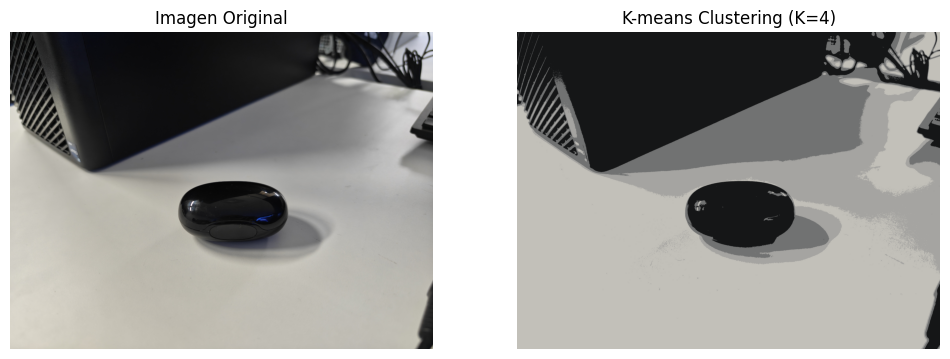

In [10]:
#K-means clustering.
# Convertir la imagen a un arreglo 2D de píxeles
pixel_values = bgr.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
# Definir criterios y número de clusters (K)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 4
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Convertir los centros a uint8
centers = np.uint8(centers)
# Mapear las etiquetas a los colores de los centros
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(bgr.shape)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('K-means Clustering (K=4)')
plt.axis('off')
plt.show()

## Parte 5: Desafío en tiempo real (último punto)
Implementar un programa que capture video en tiempo real desde la cámara y aplique detección de bordes (Canny) en cada cuadro.

In [12]:
# Captura de video en tiempo real desde la camara con deteccion de bordes (Canny) en cada cuadro
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("No se pudo abrir la cámara.")
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("No se pudo recibir el frame. Saliendo...")
            break
        # Convertir a escala de grises
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Aplicar Canny
        edges = cv2.Canny(gray, 100, 200)
        # Mostrar el resultado
        cv2.imshow('Canny en tiempo real', edges)
        # Salir con la tecla 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 